In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/online retail insights/Online Retail.xlsx")
print(df.head(10))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26

In [ ]:
print(df.isnull().sum())
print(df.columns) # Check the actual column names
print(df.shape)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
year           0
month          0
day            0
weekday        0
hour           0
dtype: int64
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'year', 'month',
       'day', 'weekday', 'hour'],
      dtype='object')
(397884, 14)


In [ ]:
df= df[df["Description"].notnull()]
df = df[df["Quantity"]>0]
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df = df[df["UnitPrice"]>0]
df = df[df["CustomerID"].notnull()]

In [ ]:
print(df.isnull().sum())


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [ ]:
df["year"] = df["InvoiceDate"].dt.year
df["month"] = df["InvoiceDate"].dt.month
df["day"] = df["InvoiceDate"].dt.day
df["weekday"] = df["InvoiceDate"].dt.day_name()
df["hour"] = df["InvoiceDate"].dt.hour


EDA1: Top selling products

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalPrice, dtype: float64


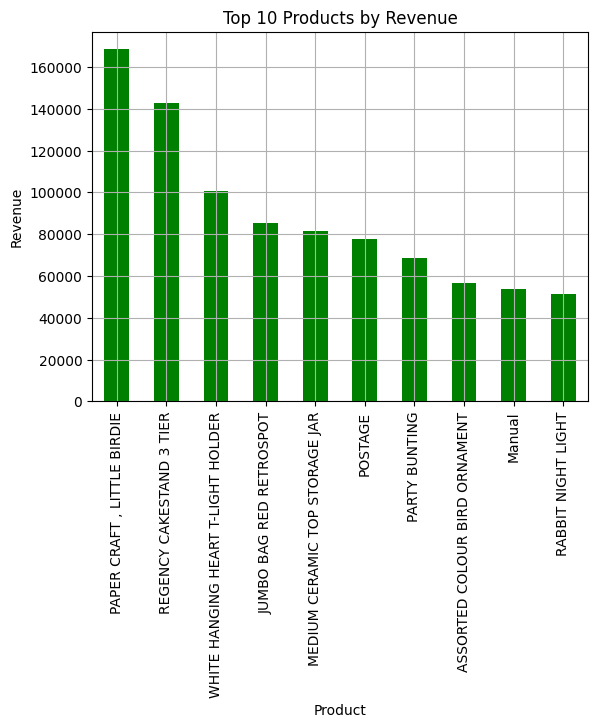

In [ ]:
Top_Products= df.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False).head(10)
print(Top_Products)

Top_Products.plot(kind="bar", color= "Green")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Top 10 Products by Revenue")
plt.grid()
plt.show()




EDA2: Top 10 countries by revenue

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: TotalPrice, dtype: float64


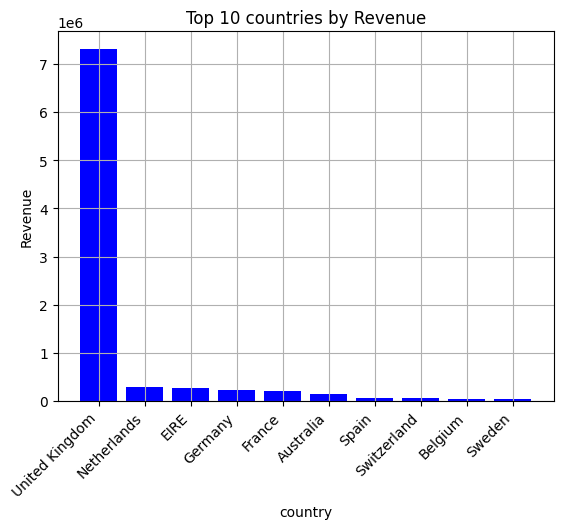

In [ ]:
Top_country = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)
print(Top_country)

plt.bar(Top_country.index,Top_country.values, color = "blue", )
plt.xlabel("country")
plt.ylabel("Revenue")
plt.title("Top 10 countries by Revenue")
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()



Monthly sales

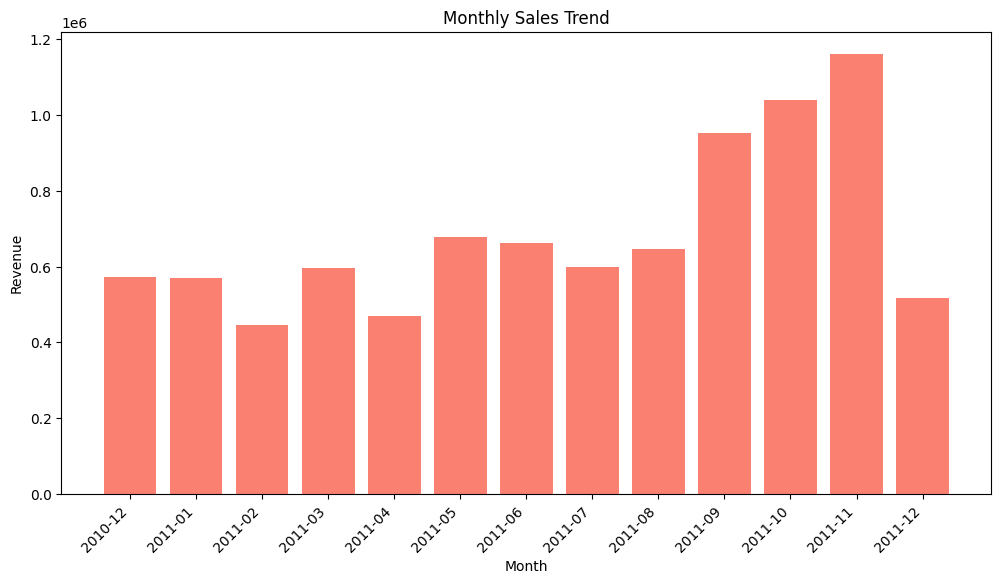

In [ ]:
# Monthly sales
df['month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('month')['TotalPrice'].sum()

# Plot as bar chart
plt.figure(figsize=(12,6))
plt.bar(monthly_sales.index.astype(str), monthly_sales.values, color='salmon')
plt.xticks(rotation=45, ha='right')
plt.title('Monthly Sales Trend')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.show()


Exporting the cleaned data

In [ ]:
df.to_csv("online_retail_cleaned.csv", index="False")